In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats

from scipy.stats import norm

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format

import env
import explore
from wrangle_zillow import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values

In [2]:
df = pd.read_csv("zillowcluster_df.csv")

In [3]:
df = clean_zillow(df)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5)

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,latitude,longitude,lotsizesquarefeet,...,taxamount,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,age_of_home,bath_pers_qft,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,0.00,34.22,-118.62,"9,158.00",...,"7,659.36",-0.01,2017-07-07,None,Central,49.00,0.00,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,0.00,34.22,-118.62,"9,035.00",...,"8,123.91",0.02,2017-08-29,Central,Central,49.00,0.00,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,0.00,34.22,-118.62,"9,800.00",...,"6,673.24",0.08,2017-04-04,Central,Central,49.00,0.00,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,0.00,34.22,-118.62,"11,285.00",...,"1,116.46",-0.04,2017-03-17,None,Central,61.00,0.00,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,0.00,34.22,-118.62,"11,239.00",...,"5,239.85",-0.01,2017-03-24,None,Central,61.00,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167638721,2.00,5.00,4.00,4.00,"2,230.00",6037,0.00,33.85,-118.38,"7,280.00",...,"14,861.90",-0.02,2017-07-18,None,Central,7.00,0.00,1,0,0
167638926,2.00,1.00,2.00,2.00,"1,480.00",6037,0.00,34.11,-117.81,"7,280.00",...,"4,868.86",-0.01,2017-01-31,Central,Central,11.00,0.00,1,0,0
167639152,2.00,1.00,4.00,5.00,"4,232.00",6037,0.00,33.98,-117.80,"7,280.00",...,"17,926.36",0.02,2017-05-12,Central,Central,44.00,0.00,1,0,0


In [6]:
missing_zero_values_table(df)

Your selected dataframe has 25 columns and 73201 Rows.
There are 0 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
heatingorsystemtypeid,0,0,0.00,0,0.00,float64
fireplaceflag,64823,0,0.00,64823,88.60,int64
orange_county,53097,0,0.00,53097,72.50,uint8
la_county,26202,0,0.00,26202,35.80,uint8
bath_pers_qft,65,0,0.00,65,0.10,float64
age_of_home,0,0,0.00,0,0.00,float64
heatingorsystemdesc,0,0,0.00,0,0.00,object
airconditioningdesc,0,0,0.00,0,0.00,object
transactiondate,0,0,0.00,0,0.00,datetime64[ns]
logerror,0,0,0.00,0,0.00,float64


In [7]:
df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,latitude,longitude,lotsizesquarefeet,...,taxamount,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,age_of_home,bath_pers_qft,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,0.00,34.22,-118.62,"9,158.00",...,"7,659.36",-0.01,2017-07-07,None,Central,49.00,0.00,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,0.00,34.22,-118.62,"9,035.00",...,"8,123.91",0.02,2017-08-29,Central,Central,49.00,0.00,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,0.00,34.22,-118.62,"9,800.00",...,"6,673.24",0.08,2017-04-04,Central,Central,49.00,0.00,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,0.00,34.22,-118.62,"11,285.00",...,"1,116.46",-0.04,2017-03-17,None,Central,61.00,0.00,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,0.00,34.22,-118.62,"11,239.00",...,"5,239.85",-0.01,2017-03-24,None,Central,61.00,0.00,1,0,0


In [8]:
scalecols = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fireplacecnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'roomcnt', 'age_of_home', 'bath_pers_qft', 'airconditioningtypeid', 'heatingorsystemtypeid']

In [9]:
# def scale_my_data(train, validate, test):
#    scaler = MinMaxScaler()
#     scaler.fit(train[scalecols])
#     X_train_scaled = scaler.transform(train[scalecols])
#    X_validate_scaled = scaler.transform(validate[scalecols])
#    X_test_scaled = scaler.transform(test[scalecols])

#    train[scalecols] = X_train_scaled
#    validate[scalecols] = X_validate_scaled
#    test[scalecols] = X_test_scaled
#    return train, validate, test
          
def prep_zillow(df):
  

    train, validate, test = explore.train_validate_test_split(df, target='logerror', seed=123)
#    train, validate, test = scale_my_data(train, validate, test)
    return df, train, validate, test

df, train, validate, test = prep_zillow(df)

train.head(10)

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,latitude,longitude,lotsizesquarefeet,...,taxamount,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,age_of_home,bath_pers_qft,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12593082,2.00,5.00,2.00,3.00,"1,172.00",6037,0.00,33.84,-118.29,"4,951.00",...,"3,506.70",0.03,2017-09-13,None,Central,60.00,0.00,1,0,0
17233792,1.00,5.00,1.00,2.00,"1,108.00",6111,0.00,34.27,-118.72,"5,366.00",...,"5,136.66",-0.03,2017-09-12,None,None,51.00,0.00,0,0,1
10938920,2.00,5.00,1.00,3.00,"1,280.00",6037,0.00,34.17,-118.33,"5,578.00",...,"6,440.19",-0.07,2017-06-30,None,Central,75.00,0.00,1,0,0
12431465,7.00,5.00,1.00,3.00,"1,219.00",6037,0.00,33.83,-118.10,"5,176.00",...,"3,755.53",0.04,2017-07-25,None,Floor/Wall,68.00,0.00,1,0,0
10856663,2.00,1.00,2.00,2.00,"1,330.00",6037,0.00,34.16,-118.46,"7,280.00",...,"6,022.51",0.03,2017-06-07,Central,Central,12.00,0.00,1,0,0
10846044,2.00,1.00,3.00,3.00,"1,580.00",6037,0.00,34.18,-118.44,"18,204.00",...,"2,382.72",-0.01,2017-03-01,Central,Central,16.00,0.00,1,0,0
14677918,1.00,5.00,1.00,1.00,729.00,6059,0.00,33.70,-117.91,"7,280.00",...,"3,075.54",-0.03,2017-06-15,None,None,23.00,0.00,0,1,0
11465971,2.00,1.00,3.00,3.00,"1,414.00",6037,0.00,33.95,-118.44,"242,045.00",...,"3,996.02",0.01,2017-05-16,Central,Central,42.00,0.00,1,0,0
14720018,1.00,5.00,2.50,3.00,"1,351.00",6059,0.00,33.64,-117.67,"7,280.00",...,"4,673.78",0.05,2017-06-28,None,None,35.00,0.00,0,1,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40992 entries, 12593082 to 12842245
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         40992 non-null  float64       
 1   airconditioningtypeid         40992 non-null  float64       
 2   bathroomcnt                   40992 non-null  float64       
 3   bedroomcnt                    40992 non-null  float64       
 4   calculatedfinishedsquarefeet  40992 non-null  float64       
 5   fips                          40992 non-null  object        
 6   fireplacecnt                  40992 non-null  float64       
 7   latitude                      40992 non-null  float64       
 8   longitude                     40992 non-null  float64       
 9   lotsizesquarefeet             40992 non-null  float64       
 10  poolcnt                       40992 non-null  float64       
 11  roomcnt           

In [11]:
df.shape, train.shape, validate.shape, test.shape

((73201, 25), (40992, 25), (17568, 25), (14641, 25))

# TIME TO EXPLORE THE DATA

In [12]:
binary_vars = ['poolcnt', 'la_county', 'orange_county', 'ventura_county']
categorical_vars = ['fips', 'yearbuilt', 'airconditioningdesc', 'heatingorsystemdesc']
quant_vars = ['bathroomcnt', 'calculatedfinishedsquarefeet', 'fireplacecnt', 'latitude','poolcnt', 'age_of_home', 'taxvaluedollarcnt', 'logerror']
categorical_target = 'fips'
continuous_target = 'logerror'

Is log error related to properties with a pool?

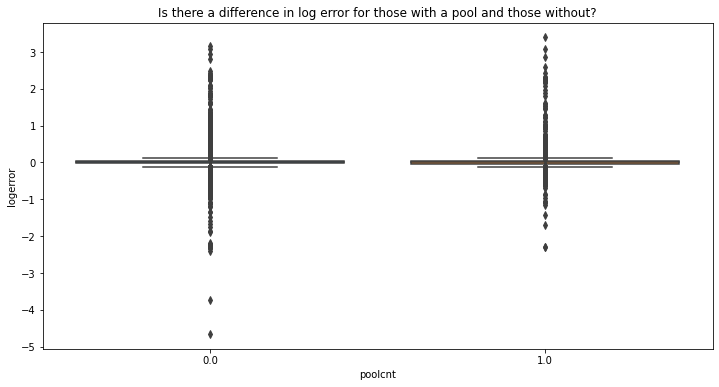

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(train.poolcnt, train.logerror)
plt.title("Is there a difference in log error for those with a pool and those without?")
plt.show()

In [51]:
stats.levene(train[train.poolcnt==0].logerror, 
             train[train.poolcnt==1].logerror)

LeveneResult(statistic=0.21174168318978565, pvalue=0.645408143042095)

In [52]:
stats.ttest_ind(train[train.poolcnt==0].logerror, 
                train[train.poolcnt==1].logerror, 
                equal_var=True
               )

Ttest_indResult(statistic=1.984962642575842, pvalue=0.047155282472630074)

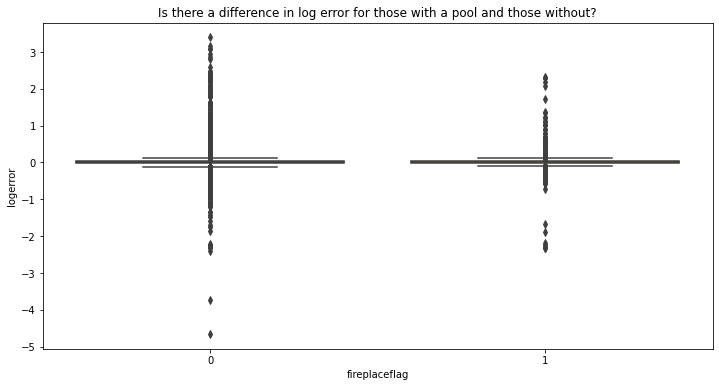

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(train.fireplaceflag, train.logerror)
plt.title("Is there a difference in log error for those with a pool and those without?")
plt.show()

In [53]:
stats.levene(train[train.fireplaceflag==0].logerror, 
             train[train.fireplaceflag==1].logerror)


LeveneResult(statistic=16.723319979502808, pvalue=4.332860595044563e-05)

In [54]:
stats.ttest_ind(train[train.fireplaceflag==0].logerror, 
                train[train.fireplaceflag==1].logerror, 
                equal_var=True
               )

Ttest_indResult(statistic=0.6373615655461276, pvalue=0.5238929172406446)

Is there a relationship between logerror and square footage?

Is there a relationship
between square footage and log error?


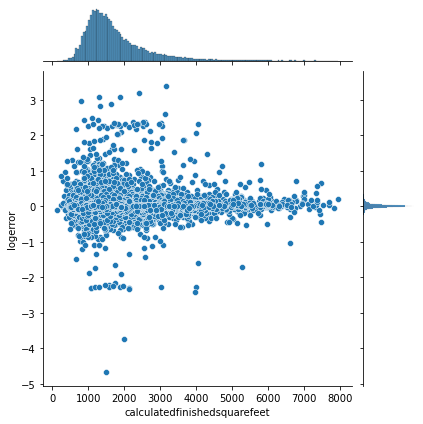

In [17]:
print("Is there a relationship\nbetween square footage and log error?")
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
plt.xlabel("Total Square Feet")
plt.ylabel("Log Error")
plt.show()

Is there a relationship between log error and latitude?

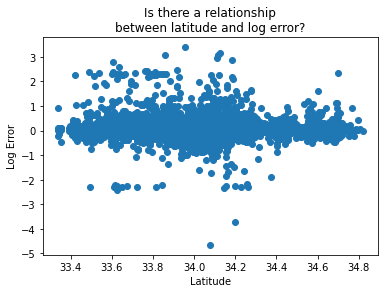

In [18]:
# plot age by spending_score
plt.scatter(train.latitude, train.logerror)
plt.xlabel("Latitude")
plt.ylabel("Log Error")
plt.title("Is there a relationship\nbetween latitude and log error?")
plt.show()

Is there a relationship between homes up to 2,000 square feet and log error?

In [29]:
train['sqft_bin'] = pd.cut(train.calculatedfinishedsquarefeet, [0,2500, 5000])

train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,latitude,longitude,lotsizesquarefeet,...,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,age_of_home,bath_pers_qft,la_county,orange_county,ventura_county,sqft_bin
parcelid,,,,,,,,,,,,,,,,,,,,,
12593082,2.00,5.00,2.00,3.00,"1,172.00",6037,0.00,33.84,-118.29,"4,951.00",...,0.03,2017-09-13,None,Central,60.00,0.00,1,0,0,"(0, 2500]"
17233792,1.00,5.00,1.00,2.00,"1,108.00",6111,0.00,34.27,-118.72,"5,366.00",...,-0.03,2017-09-12,None,None,51.00,0.00,0,0,1,"(0, 2500]"
10938920,2.00,5.00,1.00,3.00,"1,280.00",6037,0.00,34.17,-118.33,"5,578.00",...,-0.07,2017-06-30,None,Central,75.00,0.00,1,0,0,"(0, 2500]"
12431465,7.00,5.00,1.00,3.00,"1,219.00",6037,0.00,33.83,-118.10,"5,176.00",...,0.04,2017-07-25,None,Floor/Wall,68.00,0.00,1,0,0,"(0, 2500]"
10856663,2.00,1.00,2.00,2.00,"1,330.00",6037,0.00,34.16,-118.46,"7,280.00",...,0.03,2017-06-07,Central,Central,12.00,0.00,1,0,0,"(0, 2500]"


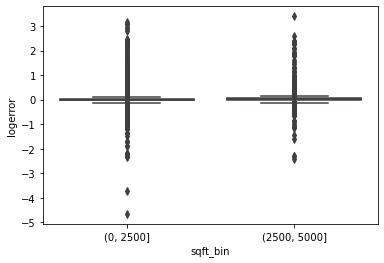

In [30]:
sns.boxplot(train.sqft_bin, train.logerror)
plt.show()

In [31]:
# test the assumption of equal variance

stats.levene(train[train.calculatedfinishedsquarefeet <= 2500].logerror, 
             train[train.calculatedfinishedsquarefeet > 2500].logerror
            )

LeveneResult(statistic=25.954749491768904, pvalue=3.510623094782247e-07)

In [33]:
stats.ttest_ind(train[train.calculatedfinishedsquarefeet <= 2500].logerror, 
             train[train.calculatedfinishedsquarefeet > 2500].logerror,
                equal_var=False
               )

Ttest_indResult(statistic=-5.141036799862918, pvalue=2.801959804902682e-07)

In [55]:
group1 = train[train.poolcnt == 1]['logerror']
group2 = train[train.poolcnt == 0]['logerror']

stats.mannwhitneyu(group1, group2)

MannwhitneyuResult(statistic=136154137.5, pvalue=1.0428399778722363e-08)

In [56]:
group1 = train[train.fireplaceflag == 1]['logerror']
group2 = train[train.fireplaceflag == 0]['logerror']

stats.mannwhitneyu(group1, group2)

MannwhitneyuResult(statistic=84543707.0, pvalue=0.04353067970767778)

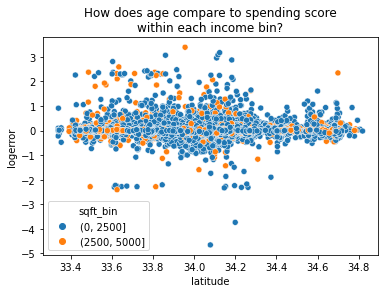

In [41]:
sns.scatterplot(x='latitude', y='logerror',
               data=train, hue='sqft_bin')
plt.title("How does age compare to spending score\nwithin each income bin?")
plt.show()

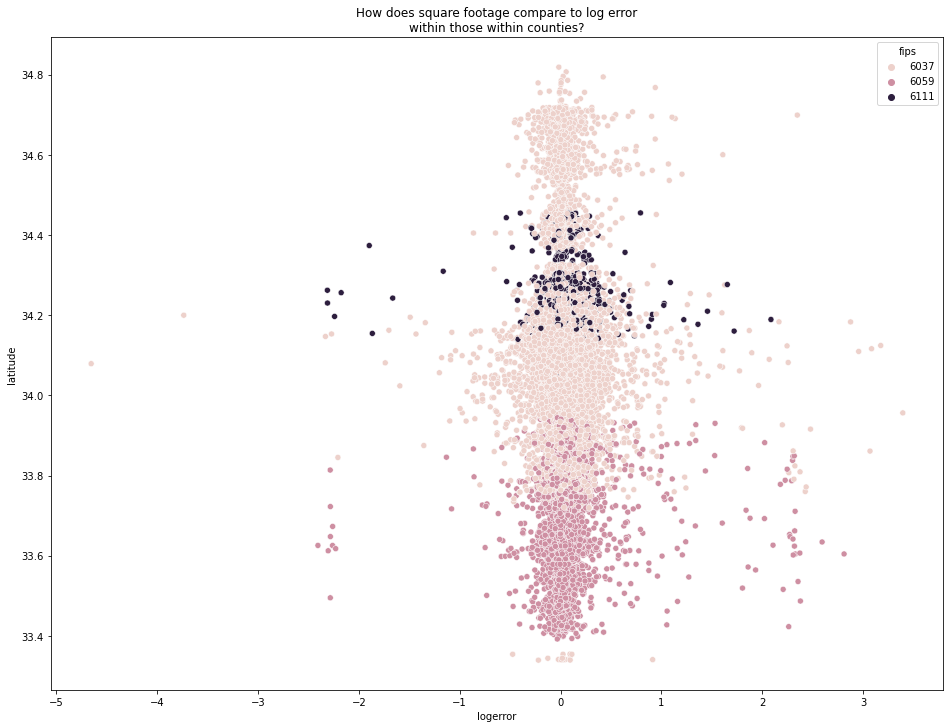

In [80]:
plt.figure(figsize=(16,12))
sns.scatterplot(x='logerror', y='latitude',
               data=train, hue='fips')
plt.title("How does square footage compare to log error\nwithin those within counties?")
plt.show()

<h4>Takeaway</h4>

It appears that there is more of a positive log error (over-value) with properties with a pool then those without.

In [21]:

df_with_months = df
df_with_months['sale_month'] = df_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).month)
df_with_months['sale_day'] = df_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).day)
df_with_months['sale_year'] = df_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).year)


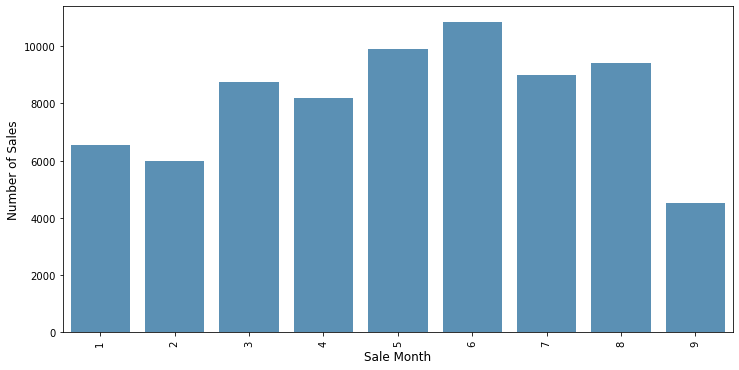

In [22]:
color = sns.color_palette()

num_of_sales = df_with_months['sale_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(num_of_sales.index, num_of_sales.values, alpha=0.8, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Sale Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.show()